### Garima Thakur

GRIP : The Sparks Foundation

Task 6: Prediction using Decision Tree Algorithm

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [2]:
#reading the data
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Dropping the ID column
df = df.drop(('Id'), axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Let's check the column presents
df.keys()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# Information of the data
#df.info()

In [6]:
#checking the null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

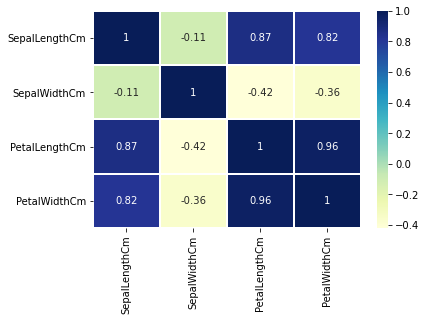

In [7]:
# Check the correlation of the data
df.corr()
sns.heatmap(df.corr(), cmap ="YlGnBu", linecolor='white', linewidths=1, annot = True )

In [8]:
df["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

We have three types of species present:

    Iris-setosa  
    Iris-versicolor
    Iris-virginica 

In [9]:
## describe the data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

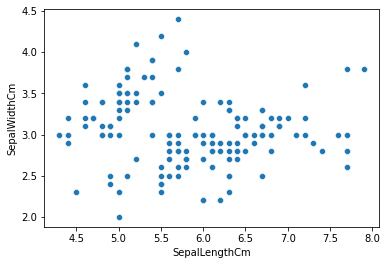

In [10]:
sns.scatterplot(data = df, x = "SepalLengthCm", y="SepalWidthCm")

We see the scattered data, but we are not getting any useful info out of this plot.
So we will plot the colored plot.

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

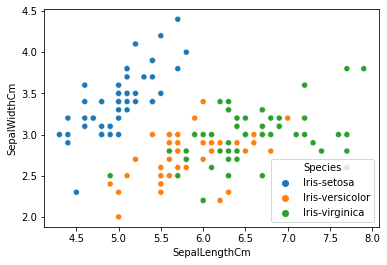

In [11]:
sns.scatterplot(data = df, x = "SepalLengthCm", y="SepalWidthCm", hue = "Species")

Here you can differentiate between different species present in our data

Visualize data with the help of pairplot.

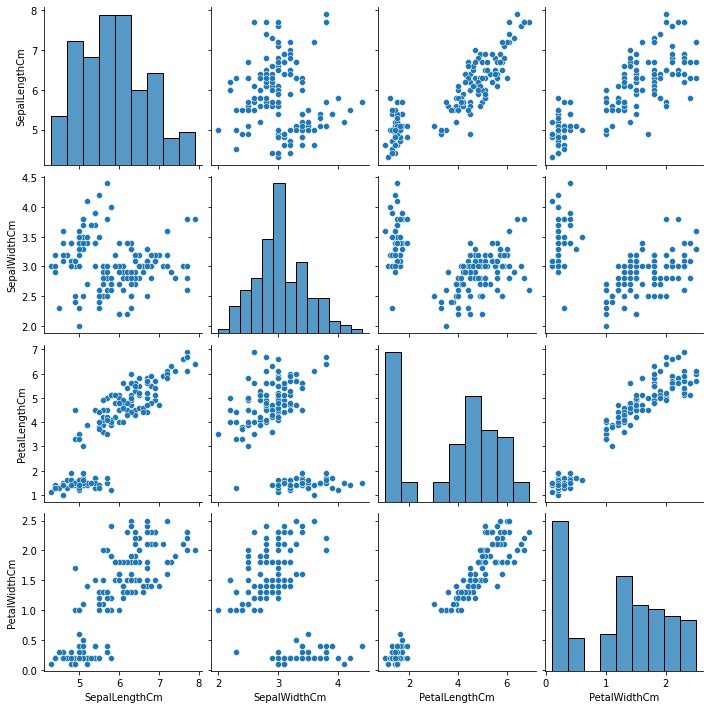

In [12]:
sns.pairplot(df, kind = "scatter")

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

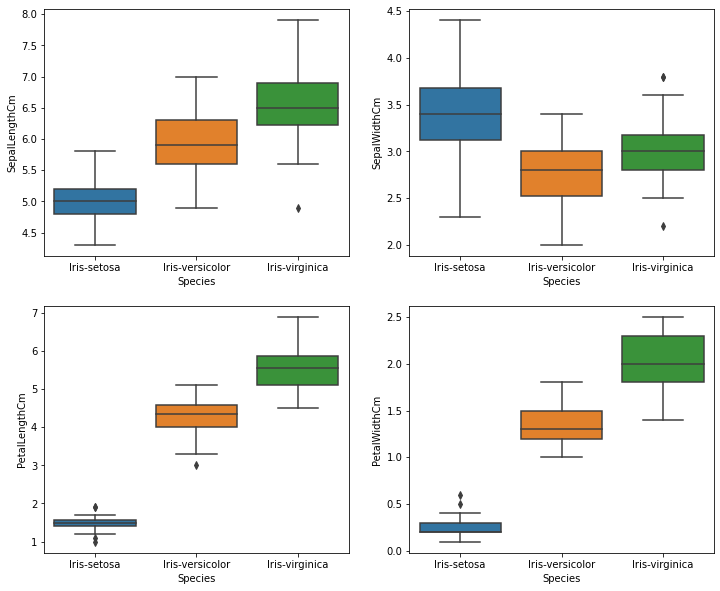

In [13]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="SepalLengthCm",data=df)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="SepalWidthCm",data=df)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="PetalLengthCm",data=df)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="PetalWidthCm",data=df)

Let's split the data in the input and the output data 

In [14]:
X= df.drop('Species', axis = 1)
y= df.Species

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Applying Decision Tree Classifier 

In [16]:
dtree = DecisionTreeClassifier(max_depth = 6)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [17]:
y_pred = dtree.predict(X_test)

In [18]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [19]:
dtree.score(X_test, y_test)

1.0

Let's visualize the tree

[Text(418.5, 498.3, 'PetalLengthCm <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = e'),
 Text(354.11538461538464, 407.70000000000005, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = S'),
 Text(482.8846153846154, 407.70000000000005, 'PetalWidthCm <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = e'),
 Text(257.53846153846155, 317.1, 'PetalLengthCm <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = p'),
 Text(128.76923076923077, 226.5, 'PetalWidthCm <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = p'),
 Text(64.38461538461539, 135.89999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = p'),
 Text(193.15384615384616, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = e'),
 Text(386.3076923076923, 226.5, 'PetalWidthCm <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = e'),
 Text(321.9230769230769, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = e'

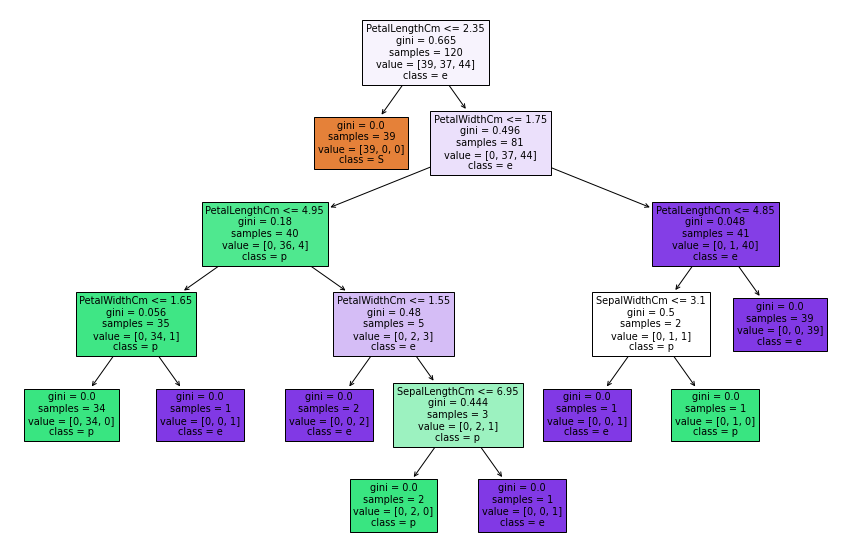

In [20]:
from sklearn import tree
fig, ax =  plt.subplots(figsize=(15,10))
tree.plot_tree(dtree, feature_names=df.columns, class_names='Species', filled=True)

Thank you!